# Занятие 13. Компьютерное зрение
## Что такое компьютерное зрение?

Когда человек использует Face ID на телефоне или запускает поиск по изображению в браузере, «открывает глаза» компьютерное зрение.

**Компьютерное зрение** (англ. computer vision, CV) — это область искусственного интеллекта. Способность «видеть» у компьютера появилась благодаря глубокому обучению (англ. deep learning) — разновидности машинного обучения, которое использует для решения задач нейронные сети.

Задача специалистов в области компьютерного зрения — научить компьютер воспринимать изображения как человек.
Человеческое зрение устроено так, что позволяет улавливать высокоуровневые признаки, то есть легко отличить кота от воробья, опираясь на опыт: у кота есть уши, усы и хвост, у воробья — крылья и клюв.

Компьютер не сможет идентифицировать объект перед собой без исходных данных и не умеет отделять важное от неважного. Для него цветное изображение похоже на мешочки с цифрами: он «видит» набор пикселей, где каждый пиксель — это три числа, обозначающие количество красного, зелёного и синего по цветовой модели RGB (в случае чёрно-белых изображений — одно число). Пиксель зелёного цвета может относиться к траве или дому такого же оттенка, но увидеть более полную картину компьютеру не под силу.

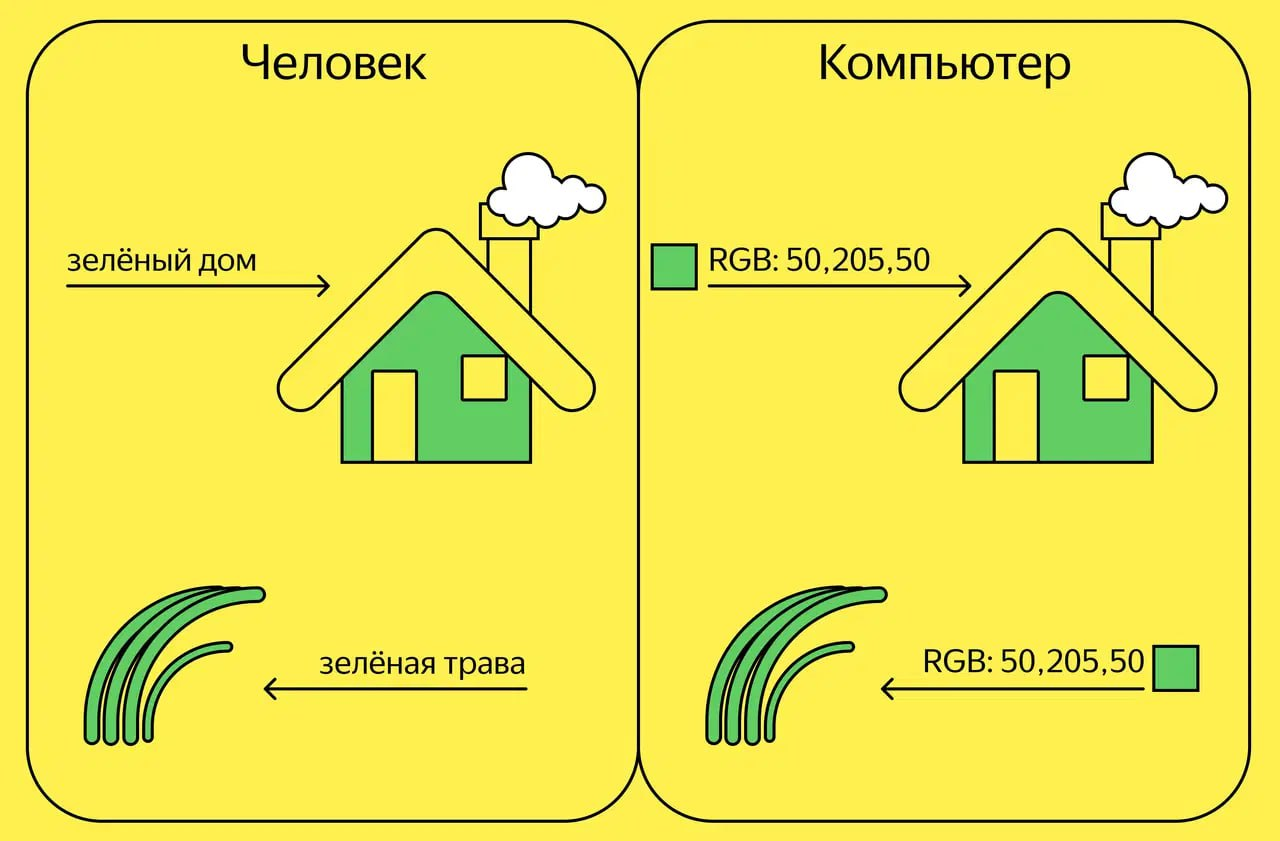

## Задачи компьютерного зрения
1. Классификация, когда объекту присваивается определённый класс. Простыми словами, модель определяет его в одну из групп, которую знает: человек, скамейка, чемодан.

2. Локализация, то есть определение местоположения объекта.

3. Детектирование. Например, можно обнаружить в метро забытую вещь в режиме реального времени. Компьютер проведёт локализацию и классифицирует его.

4. Сегментация делится на два вида. Первый — семантическая сегментация, которая отделяет изображения от фона и позволяет накладывать на них маски. Ей удастся разделить объекты на классы и выделить масками разного цвета: котов — красной, а собак — зелёной. Другой пример — размытый фон позади человека. На шаг впереди сегментация объектов. Котов и собак она распределит по классам, но вдобавок покажет, что они отличаются, и выделит их как разные объекты: собака № 1 и собака № 2.

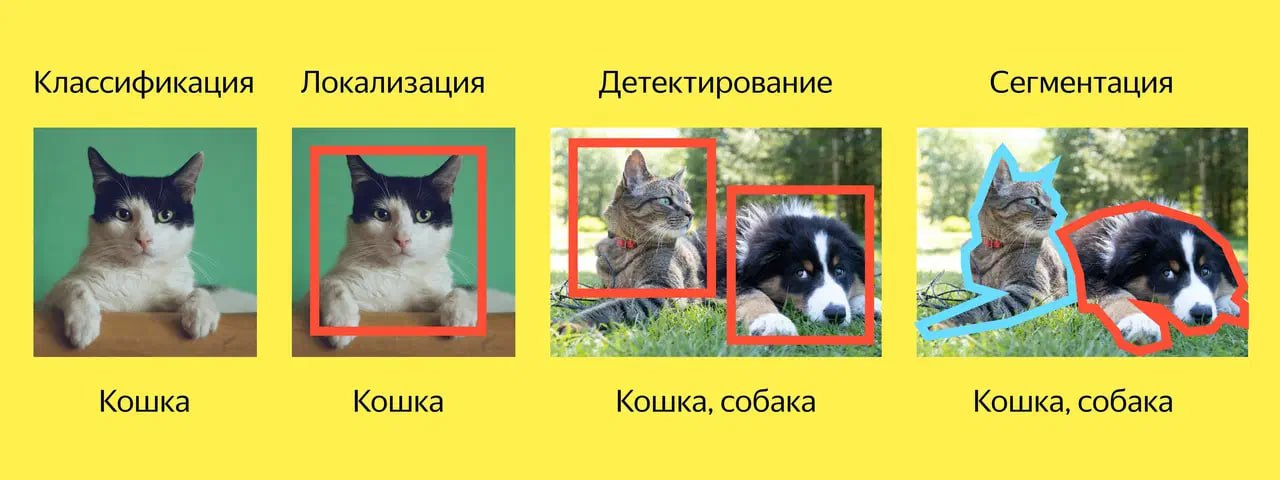

## Применение компьютерного зрения
#### Безопасность
Кроме Face ID компьютерное зрение используют для распознавания лиц в банках и метро, оплатах с помощью биометрии. Сейчас модели компьютерного зрения научились делать это даже несмотря на маску на лице человека. Камеры видеонаблюдения на дорогах — тоже результат работы компьютерного зрения.

#### Промышленность
При постройке зданий компьютерное зрение может определять дефекты металла, незаметные человеческому глазу. Изображение подаётся в модель, чтобы узнать процент дефекта материалов с большей точностью, чем смог бы определить специалист.

#### Медицина
Компьютерное зрение помогает с классификацией: сканирует раковые опухоли и определяет их злокачественность. С этой задачей обученные нейросети справляются очень хорошо.

#### Распознавание текста
Модель компьютерного зрения может извлечь текст из изображения или прочитать документ и резюмировать то, что в нём написано. Специалисты экономят время, читать многостраничную документацию не придётся.

## Работа с изображениями в python
Вообще, для работы с изображениями для задач компьютерного зрения существует библиотека opencv, которая является профессональным стандартом в этой области. Однако можно применять и другие модули языка программирования python, если спектр ваших задач не очень большой.

In [1]:
#!pip3 install scikit-image opencv-python
# раскоментируйте строку выше, чтобы установить модули для работы с изображениями

### Изображения $-$ это массивы numpy

И в библиотеке `scikit-image`, и в библиотеке `openCV` изображения представляются в формате numpy-массивов. Это позволяет эффективно использовать возможности `numpy` для обработки изображений, а также удобно передавать их между функциями разных модулей для научных вычислений ЯП python. 

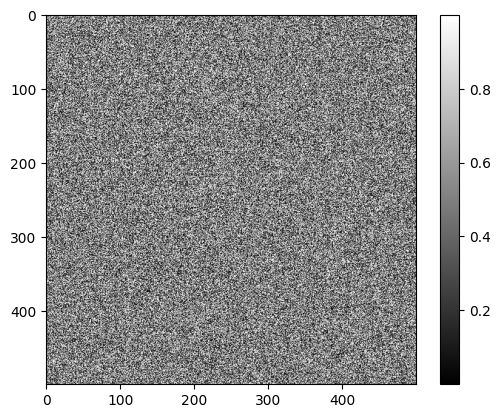

In [1]:
# посмотрим, как можно создать чёрно-белое изображение в виде 2D-массива

import numpy as np
import matplotlib.pyplot as plt

# генерируем 2d-массив случайных чисел
random_image = np.random.random([500, 500])

# отображаем массив в виде картинки в оттенках серого
plt.imshow(random_image, cmap='gray')
plt.colorbar();

Сделаем то же самое для реального изображения. Возьмём готовые изображения из датасета, сохранённого в библиотеке scikit-image.

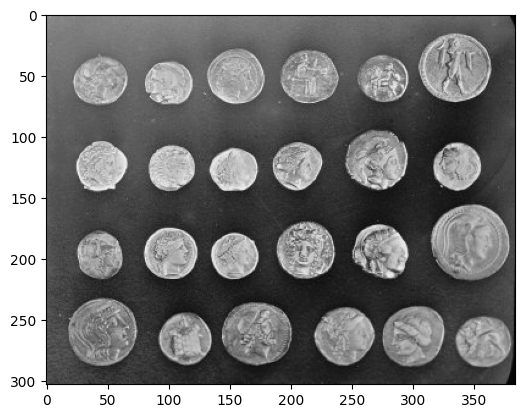

In [2]:
from skimage import data
coins = data.coins()
plt.imshow(coins, cmap='gray');

Цветное изображение будет представлено 3D-массивом, где третьим измерением будет цветовой канал: красный, зелёный и синий.

Размер массива: (300, 451, 3)


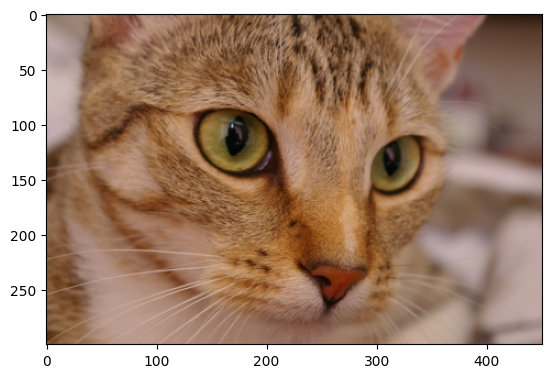

In [3]:
cat = data.chelsea()
print(f"Размер массива: {cat.shape}")
plt.imshow(cat);

Это всё массивы numpy, поэтому мы можем работать с изображениями как с массивами. Например, выберем какой-нибудь участок изображения и присвоим туда по третьему измерению массив значений цветовых каналов, отвечающий за кодировку определённого цвета.

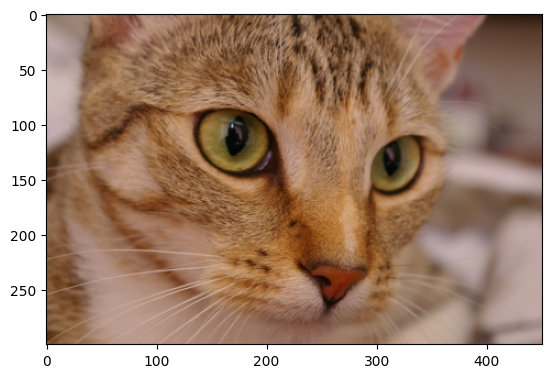

In [13]:
plt.imshow(cat[:, :, :])

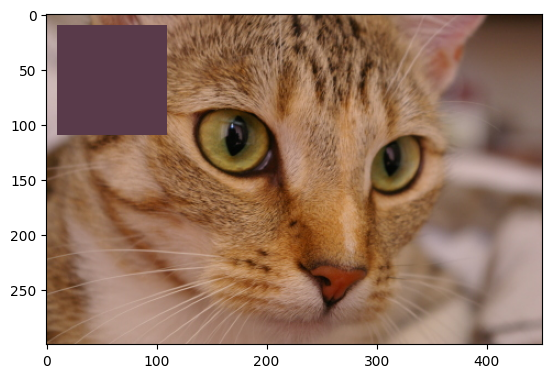

In [16]:
cat[10:110, 10:110, ] = [89, 58, 74]  # [красный, зеленый, синий]
plt.imshow(cat);

Значения пикселей (интенсивность цвета пикселя) можно представлять в двух видах:
* 0 - 1, где 0 - чёрный, 1 - белый, градация представлена в виде чисел с плавающей точкой (float);
* 0 - 255, где 0 - чёрный, 255 - белый, градация представлена в виде целых чисел (int).

Изображения можно конвертировать из одного формата в другой, используя функции `img_as_float` и `img_as_ubyte`. Например:

In [6]:
from skimage import img_as_float, img_as_ubyte

image = data.chelsea()

image_as_ubyte = img_as_ubyte(image)
image_as_float = img_as_float(image)

print(f"type: {image_as_ubyte.dtype}, min: {image_as_ubyte.min()}, max: {image_as_ubyte.max()}")
print(f"type: {image_as_float.dtype}, min: {image_as_float.min()}, max: {image_as_float.max()}")

type: uint8, min: 0, max: 231
type: float64, min: 0.0, max: 0.9058823529411765


Довольно часто изображения приходится конвертировать из цветного (rgb) в формат оттенков серого. Для этого достаточно воспользоваться функцией rgb2gray.

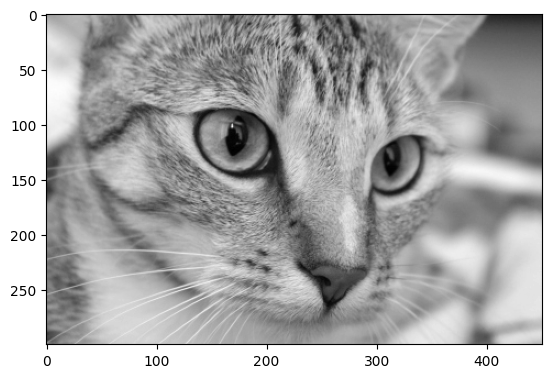

In [7]:
from skimage import color

image = data.chelsea()
gray_scaled_image  = color.rgb2gray(image)

plt.imshow(gray_scaled_image, cmap='gray');

### Линейнай фильтрация изображений
Важный класс преобразования изображений — это линейные фильтры. С их помощью решаются задачи поиска границ, уголков, удаления шумов.

#### Скользящее среднее $-$ свертка
Проще всего объяснить, что такое линейная фильтрация, на примере. Пусть требуется подсчитать среднее в окне 3 × 3 для каждого пикселя. Вычисление среднего можно записать так:

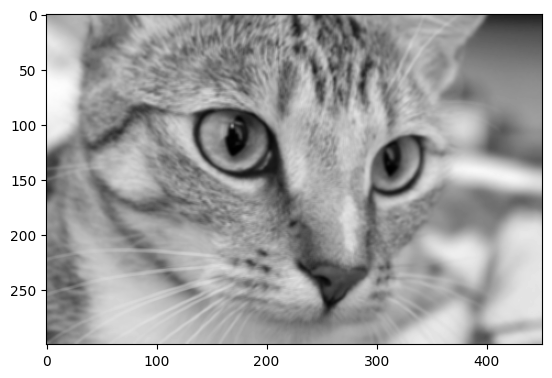

In [8]:
#возьмём изображение из предыдущего раздела
# и воспользуемся библиотекой opencv
import cv2

kernel =  np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
],np.float32) / 9

dst = cv2.filter2D(gray_scaled_image,-1,kernel)

plt.imshow(dst, cmap='gray');

Обратим внимание, что картинка стала более размытой. Такая свёртка работает и с функцией Гаусса.

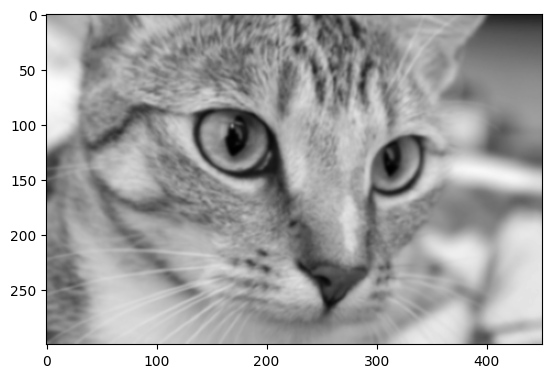

In [9]:
plt.imshow(cv2.GaussianBlur(gray_scaled_image,(5,5), 0), cmap='gray');

Как происходит фильтрация? Мы берем скользящее окно, попиксельно умножаем яркость каждого пикселя этого окна на коэффициент в матрице, складываем и результат записываем в центральную точку окна. Потом окно сдвигаем на один пиксель и делаем то же самое. И так пока не пройдем по всему изображению.

Среди линейных фильтров есть специальные матричные фильтры, которые подготавливают изображение к следующему этапу – поиску фич. Например, фильтр Собеля.

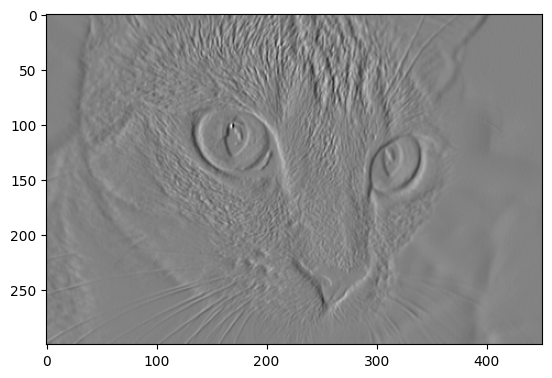

In [10]:
kernel = np.array([
    [-1,0,1], 
    [-2,0,2], 
    [-1,0,1]]
)

im = cv2.filter2D(gray_scaled_image, -1, kernel)
plt.imshow(im, cmap='gray');

Как видим, фильтр Собеля позволяет обозначить на изображении контуры. Правда, только обозначить, а не выделить. Для выделения контуров необходимо повторно обойти изображение, полученного фильтром, и уже на нем найти контуры. Это лишь заготовка, называемая контурный препарат. 

К счастью, в OpenCV есть функция нахождения контуров, которая делает все, что нужно, чтобы выделить контур. Вот фрагмент кода, который выделяет контур.

In [11]:
im

array([[ 0.00000000e+00, -3.92156863e-02, -3.92156863e-02, ...,
        -2.12062745e-02,  7.84313725e-03,  0.00000000e+00],
       [ 0.00000000e+00, -4.51094118e-02, -4.51094118e-02, ...,
        -1.19870588e-02,  1.56862745e-02,  0.00000000e+00],
       [ 0.00000000e+00, -5.49247059e-02, -4.70815686e-02, ...,
         4.78470588e-03,  2.40949020e-02,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  3.68619608e-01,  2.33291373e-01, ...,
         6.13176471e-03, -2.22044605e-16,  0.00000000e+00],
       [ 0.00000000e+00,  1.21790980e-01, -9.61352941e-02, ...,
         1.06415686e-02,  1.17647059e-02,  0.00000000e+00],
       [ 0.00000000e+00, -9.98039216e-02, -2.10143529e-01, ...,
         1.46007843e-02,  1.56862745e-02,  0.00000000e+00]])

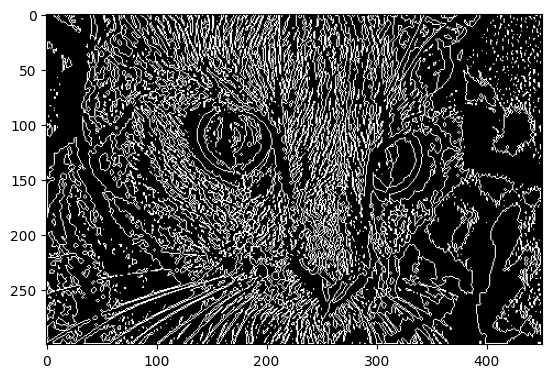

In [12]:
# зададим порог
thresh = 0.01
#получим картинку, обрезанную порогом
ret,thresh_img = cv2.threshold(im, thresh, 255, cv2.THRESH_BINARY)

thresh_img = np.array(thresh_img, np.uint8)

#надем контуры
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, 
                                       cv2.CHAIN_APPROX_SIMPLE)

#создадим пустую картинку
img_contours = np.zeros(im.shape)

#отобразим контуры
cv2.drawContours(img_contours, contours, -1, (255,255,255), 1)

plt.imshow(img_contours, cmap='gray');

## Пример обработки графических данных для машинного обучения
### Загрузка данных

Набор данных, который мы будем использовать, можно найти здесь (https://vcla.stat.ucla.edu/people/zhangzhang-si/HiT/exp5.html), он был опубликован как часть этой статьи.

Разархивируйте данные в папку, к которой пропишем путь в src. Далее мы определяем функцию для чтения, изменения размера и сохранения данных в словаре, содержащем изображения, метки (названия животных), исходные имена файлов и описание. Сами изображения хранятся в виде массивов numpy, содержащих их значения RGB. Словарь сохраняется в файле Pickle с помощью joblib. Структура данных основана на структуре, используемой для тестовых наборов данных в scikit-learn.

In [13]:
import joblib
from skimage.io import imread
from skimage.transform import resize
 
def resize_all(src, pklname, include, width=150, height=None):
     
    height = height if height is not None else width
     
    data = dict() # словарь, куда будем сохранять предобработанные данные
    data['description'] = f"resized ({int(width)}x{int(height)}) animal images in rgb"
    data['label'] = [] # список, куда будем собирать названия животных
    data['filename'] = [] # названия считанных файлов
    data['data'] = []    # сюда сохраняем изображения в формате numpy-массива
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # считываем все изображения из PATH, изменяем размер и записываем в DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)

In [14]:
# определим путь до данных
import os

data_path = 'data/AnimalFace/Image'
os.listdir(data_path)

['LionHead',
 'MouseHead',
 'DogHead',
 'BearHead',
 'Natural',
 'HumanHead',
 'ChickenHead',
 'PigHead',
 'PandaHead',
 'CatHead',
 'SheepHead',
 'DeerHead',
 'RabbitHead',
 'ElephantHead',
 'CowHead',
 'WolfHead',
 'MonkeyHead',
 'DuckHead',
 'EagleHead',
 'PigeonHead',
 'TigerHead']

Теперь мы создаем набор данных. Обратите внимание, что этот шаг не требуется каждый раз при запуске блокнота, поскольку данные хранятся в виде файла pkl, который можно загрузить напрямую в следующий раз.

В набор данных включено довольно много животных, но мы будем использовать только выборку, определенную ниже. Также мы устанавливаем ширину (и высоту) на 80 пикселей.

In [15]:
base_name = 'animal_faces'
width = 80
 
include = {'ChickenHead', 'BearHead', 'ElephantHead', 
           'EagleHead', 'DeerHead', 'MonkeyHead', 'PandaHead'}
 
resize_all(src=data_path, pklname=base_name, width=width, include=include)

BearHead
ChickenHead
PandaHead
DeerHead
ElephantHead
MonkeyHead
EagleHead


Давайте загрузим данные с диска и распечатаем сводку.

In [16]:
from collections import Counter
 
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  716
keys:  ['description', 'label', 'filename', 'data']
description:  resized (80x80) animal images in rgb
image shape:  (80, 80, 3)
labels: ['Bear' 'Chicken' 'Deer' 'Eagle' 'Elephant' 'Monkey' 'Panda']


Counter({'Bear': 101,
         'Chicken': 100,
         'Panda': 117,
         'Deer': 101,
         'Elephant': 100,
         'Monkey': 100,
         'Eagle': 97})

На изображениях ниже показан пример каждого включенного животного.

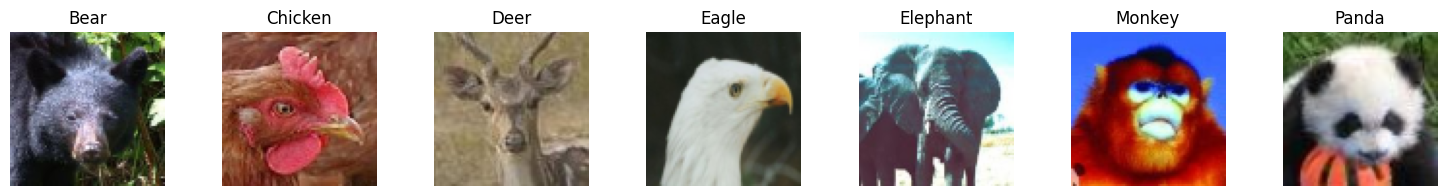

In [17]:
labels = np.unique(data['label'])
 
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

По соглашению мы называем входные данные X, а результат (метки) y.

In [18]:
X = np.array(data['data'])
y = np.array(data['label'])

Далее нам нужно разделить наши данные на тестовый набор и обучающий набор. Мы используем функцию train_test_split из scikit-learn и используем 80% общего набора для обучения, а оставшееся — для тестового набора. В наборе данных фотографии упорядочены по животным, поэтому мы не можем просто разделить их по 80%.

Чтобы понять почему, давайте посмотрим на таблицу ниже. Если данные упорядочены и мы разделили их в какой-то позиции, в итоге некоторые животные (типы) появятся только в одном из двух наборов. Например, коровы появляются только в тестовом наборе. Это проблема, так как таким образом мы никогда не научим нашу модель распознавать коров, и, следовательно, она не сможет их правильно предсказать.

Мы можем решить эту проблему, перетасовав данные перед разделением. Таким образом мы выравниваем распределения в обучающем и тестовом наборах и делаем их сопоставимыми.

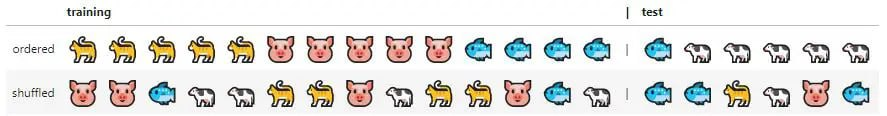

Функция train_test_split в sklearn предоставляет параметр перемешивания, который позаботится об этом при разделении. random_seed определяет перетасовку так, чтобы она была случайной, но воспроизводимой.

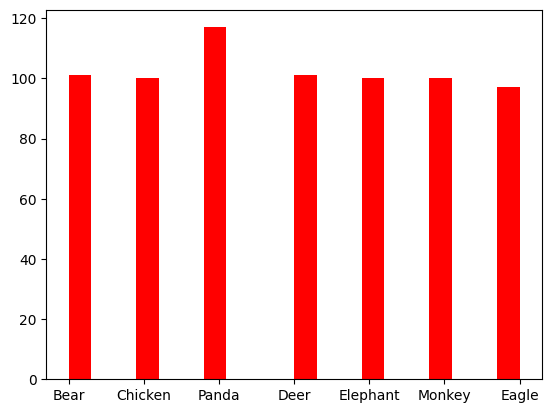

In [19]:
plt.hist(y, color='red', bins=20);

Данные почти сбалансированы.

In [20]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
    stratify=y
)

Чтобы убедиться в схожести распределения фотографий в обучающей и тестовой выборках, давайте посмотрим на относительное количество фотографий в каждой категории.

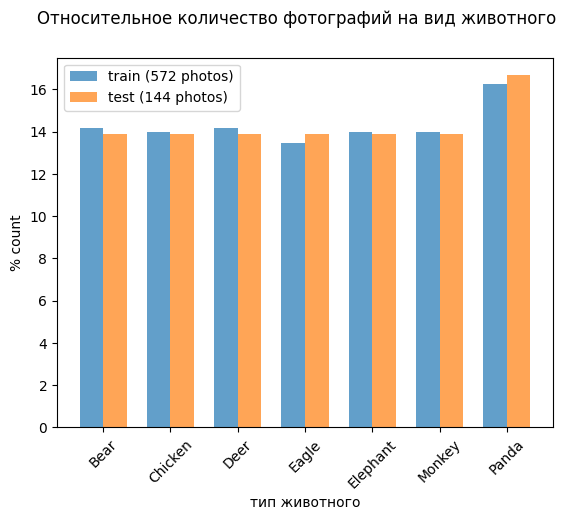

In [21]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('тип животного')
    plt.ylabel(ylabel_text)
    plt.suptitle('Относительное количество фотографий на вид животного')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    f"train ({len(y_train)} photos)", 
    f"test ({len(y_test)} photos)"
]);

Распределения не совсем равны, но на данный момент достаточно хороши. Обратите внимание, что наш набор данных довольно мал (~ 100 фотографий на категорию), поэтому разница в 1 или 2 фотографии в тестовом наборе будет иметь большое влияние на распределение. Поэтому мы использовали параметр stratify в train_test_split, чтобы обеспечить равное распределение в обучающем и тестовом наборах.

### Преподготовка данных
Классическим подходом к распознаванию объектов является HOG-SVM, что означает гистограмма ориентированных градиентов и машин опорных векторов. HOG используются для сокращения возможностей, другими словами: для снижения сложности проблемы, сохраняя при этом как можно больше вариаций.

Для расчета HOG изображение разбивается на блоки, например 8 на 8 пикселей. Для каждого из этих блоков рассчитывается величина градиента в заданном количестве направлений.

Посмотрим на пример с изображением не из наших данных.

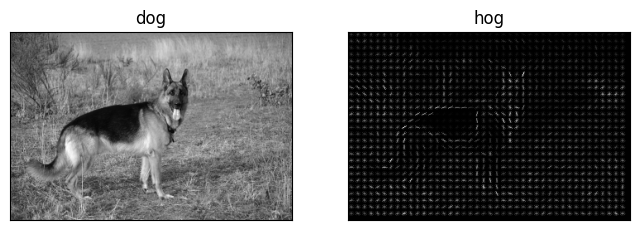

In [22]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
 
dog = imread('data/test_dog.jpg', as_gray=True)
 
# уменьшим изображение до одной третьей
dog = rescale(dog, 1/3, mode='reflect')
# вычислить hog и вернуть визуальное представление.
dog_hog, dog_hog_img = hog(
    dog, pixels_per_cell=(8, 8), 
    cells_per_block=(2, 2), 
    orientations=9, 
    visualize=True, 
    block_norm='L2-Hys')
 
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]
 
ax[0].imshow(dog, cmap='gray')
ax[0].set_title('dog')
ax[1].imshow(dog_hog_img, cmap='gray')
ax[1].set_title('hog')
plt.show()

In [23]:
print('number of pixels: ', dog.shape[0] * dog.shape[1])
print('number of hog features: ', dog_hog.shape[0])

number of pixels:  77748
number of hog features:  39852


Количество точек данных, которые необходимо обработать в нашей модели, сократилось примерно вдвое, и при некотором воображении мы все еще можем распознать собаку в HOG. Этот приём используется, если признаков слишком много и их больше, чем образцов данных.

Такое же можно использовать на наборе данных MNIST: вместо отдельных пикселей можно построить гистограмму градиентов и попробовать на ней обучить модель.

При расчете нашего HOG мы выполнили преобразование. Мы можем преобразовать весь наш набор данных с помощью трансформеров. Это объекты, которые принимают массив данных, преобразуют каждый элемент и возвращают обработанные данные.

Здесь нам нужно преобразовать цветные изображения в оттенки серого, вычислить их HOG и, наконец, масштабировать данные. Для этого мы используем три преобразователя подряд: RGB2GrayTransformer, HOGTransformer и StandardScaler. Конечным результатом является массив с HOG для каждого входного изображения.

Scikit-learn поставляется со множеством встроенных трансформеров, таких как StandardScaler для масштабирования признаков и Binarizer для сопоставления строковых функций с числовыми функциями. Кроме того, он предоставляет классы BaseEstimator и TransformerMixin для облегчения создания собственных трансформеров.

Пользовательский трансформер можно создать, унаследовав эти два класса и реализовав метод __init__, fit и Transform. Класс TransformerMixin предоставляет метод fit_transform, который сочетает в себе реализованную нами подгонку и преобразование.

Ниже мы определяем RGB2GrayTransformer и HOGTransformer.

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Преобразует цветное RGB изображение в изображение в оттенках серого
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
        return np.array([skimage.color.rgb2gray(img) for img in X])
     

class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Ожидает на вход двумерный массив изображения в оттенках серого (один канал).
    Рассчитывает гистограмму градиентов.
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: 
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

Обратите внимание, что для совместимости с scikit-learn методы fit и Transform принимают в качестве параметров X и y, хотя y здесь не используется.

Таким образом, мы готовы к предварительной обработке наших изображений RGB для масштабирования функций HOG.

In [25]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 
grayer = RGB2GrayTransformer()
hogier = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scaler = StandardScaler()
 
X_train_gray = grayer.fit_transform(X_train)
X_train_hog = hogier.fit_transform(X_train_gray)
X_train_prepared = scaler.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)

(572, 576)


### Обучение
Следующий шаг — обучение классификатора. Мы начнем со стохастического градиентного спуска (SGD), потому что он быстрый и работает достаточно хорошо.

Сначала создаем экземпляр, а затем вызываем метод fit, передавая наши обучающие данные и метки.

In [26]:
sgd_clf = SGDClassifier(random_state=2023, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=2023)

### Проверка
Для проверки обученного классификатора SGD мы будем использовать наш тестовый набор. Сначала мы трансформируем его, используя те же преобразователи, что и раньше. Однако мы должны позаботиться о том, чтобы данные наших испытаний не повлияли на трансформаторы. Некоторые преобразователи, такие как PCA (анализ главных компонентов), могут оптимизировать данные перед применением преобразования. Чтобы предотвратить это, мы вызываем преобразование, а не fit_transform для тестовых данных.

In [27]:
X_test_gray = grayer.transform(X_test)
X_test_hog = hogier.transform(X_test_gray)
X_test_prepared = scaler.transform(X_test_hog)

In [28]:
from sklearn.metrics import accuracy_score
y_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:25])
print('')
accuracy_score(y_pred, y_test) * 100

[ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True]



87.5

Процент, подобный приведенному выше, хорош, но это еще не все. А как насчет ложных срабатываний, например? Чтобы получить более глубокое представление о результатах, мы можем использовать матрицу неточностей. Это таблица, в которой каждая строка соответствует метке, а каждый столбец — прогнозу.

Матрица неточностей для SGD представляет собой матрицу 8×8. Как указано выше, правильные прогнозы появляются на главной диагонали, тогда как все недиагональные значения соответствуют неверным классификациям.

In [29]:
from sklearn.metrics import confusion_matrix

cmx = confusion_matrix(y_test, y_pred)
cmx

array([[16,  1,  2,  1,  0,  0,  0],
       [ 0, 17,  0,  0,  1,  2,  0],
       [ 0,  0, 20,  0,  0,  0,  0],
       [ 0,  3,  0, 17,  0,  0,  0],
       [ 0,  0,  0,  0, 19,  1,  0],
       [ 2,  1,  0,  1,  1, 14,  1],
       [ 0,  0,  0,  0,  0,  1, 23]])

Наибольшие значения находятся на диагонали, следовательно, большинство прогнозов верны, но есть и ошибки (~15%). Чтобы более четко представить это в виде изображения, мы делаем две вещи. Сначала мы нормализуем матрицу, разделив каждое значение на сумму его строки (т. е. количество фактических элементов с определенной меткой). Во-вторых, мы занулим главную диагональ, чтобы сосредоточиться на неверных предсказаниях.

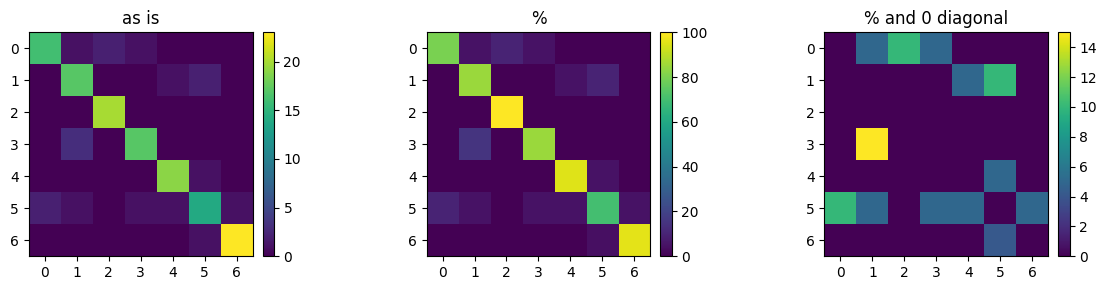


 ['Bear', 'Chicken', 'Deer', 'Eagle', 'Elephant', 'Monkey', 'Panda']


In [30]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
 
def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()
 
    np.fill_diagonal(cmx_zero_diag, 0)
 
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)
    [a.set_xticks(range(len(cmx)+1)) for a in ax]
    [a.set_yticks(range(len(cmx)+1)) for a in ax]
         
    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('as is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')
 
    dividers = [make_axes_locatable(a) for a in ax]
    cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1) 
                        for divider in dividers]
 
    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
    fig.colorbar(im3, cax=cax3)
    fig.tight_layout()
    
    plt.show()
     
plot_confusion_matrix(cmx)
print('\n', sorted(np.unique(y_test)))

Чтобы сделать правильные выводы, нам необходимо объединить то, что мы видим в матрице неточностей, с тем, что мы уже знаем о данных. Например, у нас довольно высокий процент орлов, отнесенных к курицам. Не в обиду ни орлам, ни курицам, но внутри этого набора они похожи. Кроме того, не все фотографии очень четкие, поэтому, возможно, мы могли бы изучить другие методы выделения признаков или использовать изображения с более высоким разрешением.

Попробуем объединить всё в один конвейер.

In [31]:
from sklearn.pipeline import Pipeline
from sklearn import svm
 
HOG_pipeline = Pipeline([
    ('grayier', RGB2GrayTransformer()),
    ('hogier', HogTransformer(
        pixels_per_cell=(14, 14), 
        cells_per_block=(2, 2), 
        orientations=9, 
        block_norm='L2-Hys')
    ),
    ('scaler', StandardScaler()),
    ('classier', SGDClassifier(random_state=42, max_iter=1000, tol=1e-3))
])
 
clf = HOG_pipeline.fit(X_train, y_train)
accuracy_score(clf.predict(X_test), y_test)

0.8611111111111112

Попробуем оптимизировать нашу модель. Воспользуемся моделью решетчатого поиска.

In [32]:
from sklearn.model_selection import GridSearchCV
 
param_grid = [
    {
        'hogier__orientations': [8, 9],
        'hogier__cells_per_block': [(2, 2), (3, 3)],
        'hogier__pixels_per_cell': [(8, 8), (10, 10), (12, 12)]
    },
    {
        'hogier__orientations': [8],
         'hogier__cells_per_block': [(3, 3)],
         'hogier__pixels_per_cell': [(8, 8)],
         'classier': [
             SGDClassifier(random_state=42, max_iter=1000, tol=1e-3),
             svm.SVC(kernel='linear')
         ]
    }
]

grid_search = GridSearchCV(HOG_pipeline, param_grid, 
                           cv=3, n_jobs=-1,
                           scoring='accuracy',
                           verbose=1,
                           return_train_score=True)
 
grid_res = grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


In [33]:
# сохраним модель на диск
joblib.dump(grid_res, 'hog_sgd_model.pkl');

In [34]:
print(grid_res.best_params_, grid_res.best_score_)

{'classier': SVC(kernel='linear'), 'hogier__cells_per_block': (3, 3), 'hogier__orientations': 8, 'hogier__pixels_per_cell': (8, 8)} 0.9090750436300175


In [35]:
best_pred = grid_res.predict(X_test)
accuracy_score(best_pred, y_test)

0.9444444444444444

Да, мы значительно улучшили показатель правильности ответов модели. Но что нам покажет матрица неточностей?

Стохастический градиентный спуск


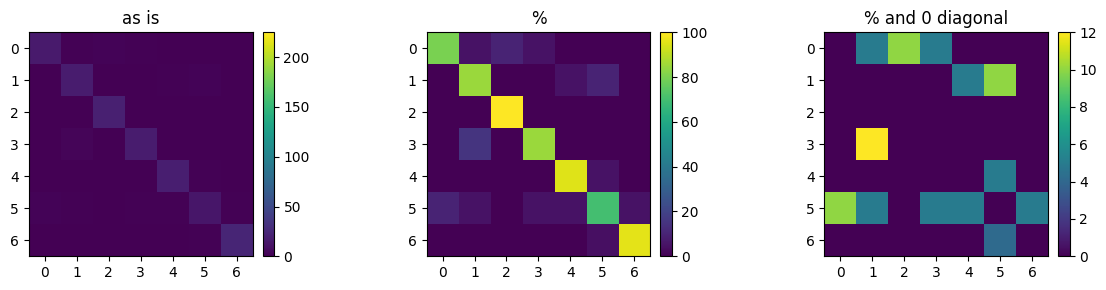

Модель опорных векторов


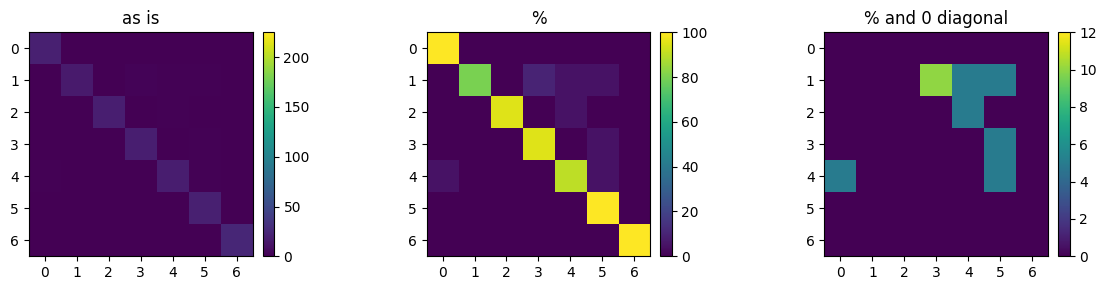

In [36]:
cmx_svm = confusion_matrix(y_test, best_pred)
print("Стохастический градиентный спуск")
plot_confusion_matrix(cmx, vmax1=225, vmax2=100, vmax3=12)
print("Модель опорных векторов")
plot_confusion_matrix(cmx_svm, vmax1=225, vmax2=100, vmax3=12)

Справа мы видим, где произошли улучшения (кажется, мы превратили кур в орлов). Теперь мы можем попытаться найти конкретные проблемы в данных или извлечь признаки для дальнейшего улучшения. К счастью, с помощью созданного нами набора инструментов мы можем позволить компьютеру выполнить за нас значительную часть этой работы.

## Упражнения
1. Выберите любое цветное изображение, загрузите его и нарисуйте на нём зелёным цветом букву "H".
2. Визуализируйте цветное изображение в каждом его цветовом канале: сначала в красном, потом в зелёном, потом в синем.
3. Ваша задача – построить систему с моделью машинного обучения, которая распознаёт по изображению рентгеновского снимка одну из 6 частей тела. Данные лежат здесь: https://www.kaggle.com/datasets/andrewmvd/medical-mnist.